<a href="https://colab.research.google.com/github/phoumithona/matrix_computation/blob/master/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

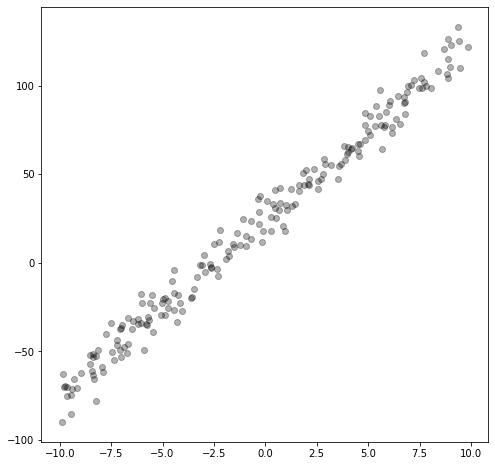

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# 1.Input Points
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color= 'k', alpha=0.3)
plt.show()

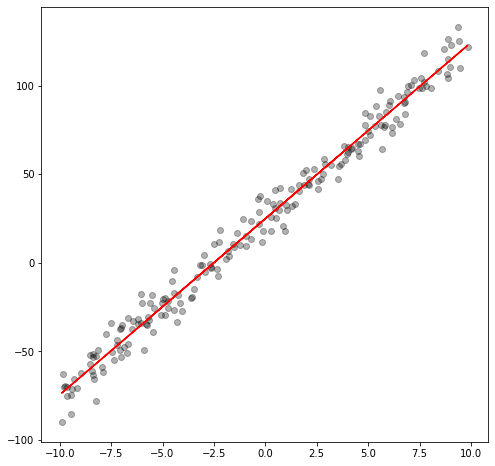

In [0]:
# 2.linear Regression Result
x = x_data
y = y_data

denominator = x.dot(x) - x.mean() * x.sum()
a = (x.dot(y) - y.mean() * x.sum()) / denominator
b = (y.mean() * x.dot(x) - x.mean() * x.dot(y)) / denominator

yhat = a * x + b

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, color= 'k', alpha=0.3)
plt.plot(x, yhat, color = 'r')
plt.show()

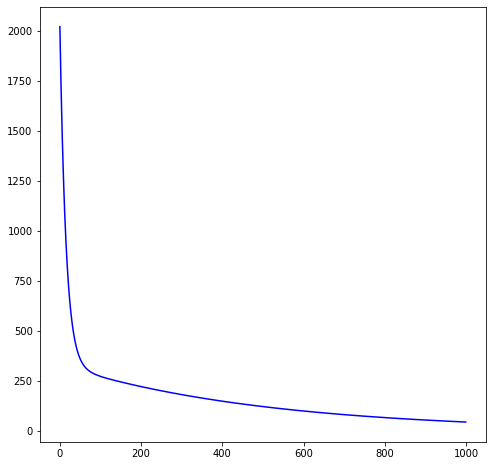

In [0]:
# 3.Plot The Energy Surface

theta_0 = np.random.normal(0,1)
theta_1 = np.random.normal(0,1)
alpha = 0.001   
iterations = 1000   
m = len(x_data)

j = []
theta0 = []  
theta1 = []

for iteration in range(iterations):
  h = theta_0 + theta_1 * x     
  temp_j = (1/(2*m))*sum((h-yhat)**2) 
  j.append(temp_j)

  theta_0 = theta_0-alpha*(1/m)*sum(h-yhat)
  theta0.append(theta_0)
  theta_1 = theta_1-alpha*(1/m)*sum((h-yhat)*x)
  theta1.append(theta_1)

plt.figure(figsize=(8, 8))
plt.plot(j, "b")
plt.show()

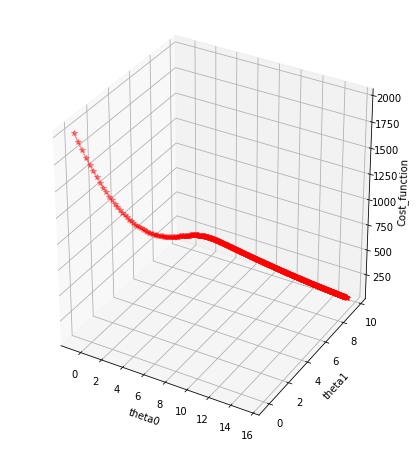

In [0]:
# 4.Plot The Gradient Descent Path On The Energy Surface

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
fig = plt.figure(figsize = (16,8))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(theta0, theta1, j, marker = '*', color = 'r', alpha = 0.4)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost_function')
plt.show()